# Feasibility

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score


# data generators 
train_dir = '/Users/jomus/Code/summer/summerepo/Compvision/data/train'
validation_dir = '/Users/jomus/Code/summer/summerepo/Compvision/data/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=False) # THIS LINE IMPORTANT


Found 464 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


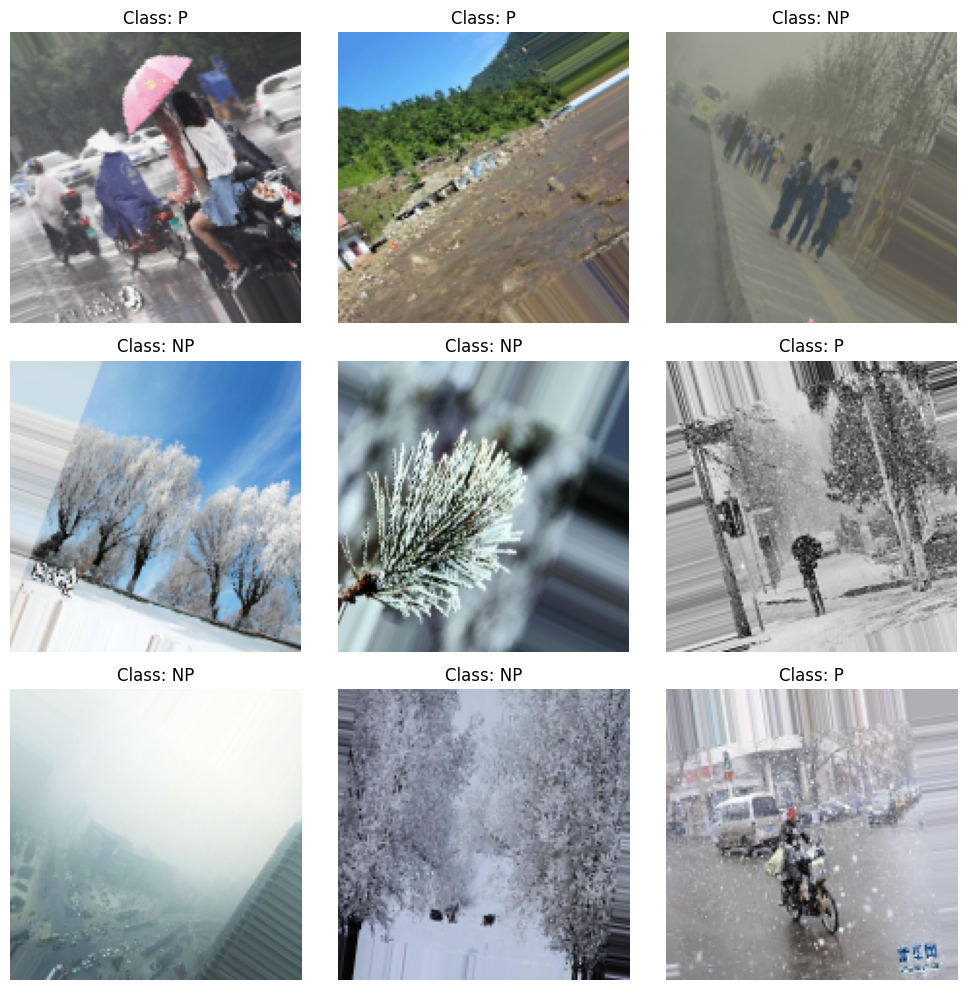

In [2]:

# get augmented images , get mapping from class index to class name, and plotting the first 9
augmented_images, augmented_labels = next(train_generator)

class_names = {v: k for k, v in train_generator.class_indices.items()}

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    class_name = class_names[int(augmented_labels[i])]
    plt.title(f"Class: {class_name}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [3]:
# defining and compiling FEASIBILITY
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = False  # Keep the base frozen

model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

# only training for a few
print(" Starting Feasibility Training ")
history = model.fit(
      train_generator,
      steps_per_epoch=29,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=6)



2025-07-14 18:49:44.647226: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-07-14 18:49:44.647377: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-14 18:49:44.647441: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1752536984.647908 18172451 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1752536984.648020 18172451 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 Starting Feasibility Training 


/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-07-14 18:49:50.302404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


24/29 ━━━━━━━━━━━━━━━━━━━━ 3s 617ms/step - accuracy: 0.4849 - loss: 0.7409

/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 665ms/step - accuracy: 0.5075 - loss: 0.7264 - val_accuracy: 0.6379 - val_loss: 0.5897
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 447ms/step - accuracy: 0.7894 - loss: 0.5190 - val_accuracy: 0.8362 - val_loss: 0.4377
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 408ms/step - accuracy: 0.8371 - loss: 0.4258 - val_accuracy: 0.8448 - val_loss: 0.3835
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 399ms/step - accuracy: 0.8442 - loss: 0.3863 - val_accuracy: 0.8621 - val_loss: 0.3405
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 401ms/step - accuracy: 0.8507 - loss: 0.3457 - val_accuracy: 0.8879 - val_loss: 0.3129
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 397ms/step - accuracy: 0.8285 - loss: 0.3512 - val_accuracy: 0.8793 - val_loss: 0.3188
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 472ms/step - accuracy: 0.8963 - loss: 0.3129 - val_accuracy: 0.8793 - val_loss: 0.2935
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 420ms/step - accuracy: 0.8782 - loss: 0.2660 - val_accuracy: 0.905


Plotting Feasibility Results 


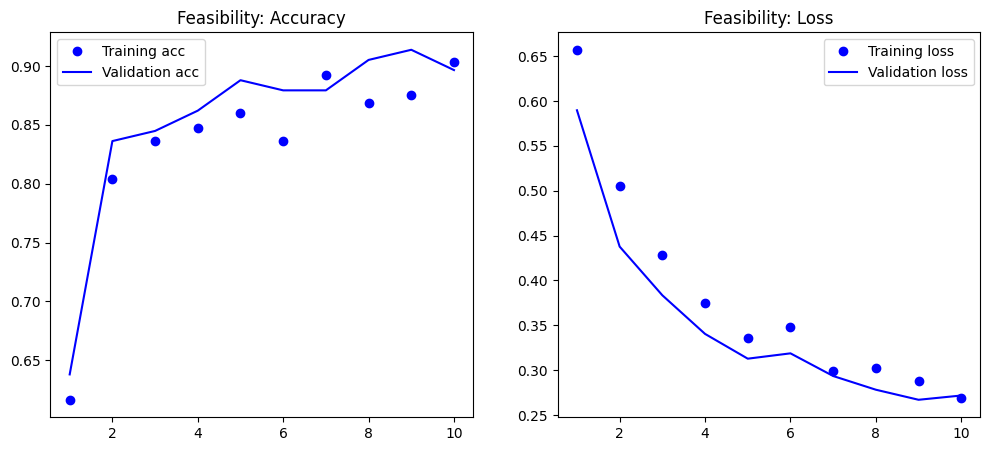

In [4]:
print("\nPlotting Feasibility Results ")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Feasibility: Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Feasibility: Loss')
plt.legend()

plt.show()

In [5]:
from sklearn.metrics import classification_report, f1_score

print(" Evaluating Feasibility Model")

# just to be safe
validation_generator.reset()

# Make predictions
# The 'model' variable currently holds the trained feasibility model
predictions = model.predict(validation_generator, steps=validation_generator.n // validation_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = validation_generator.classes

# metrics
print(f"Feasibility Model F1 Score: {f1_score(true_classes, predicted_classes):.4f}")
print("\nFeasibility Model Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=['No Precipitation', 'Precipitation']))

 Evaluating Feasibility Model
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 595ms/step
Feasibility Model F1 Score: 0.9000

Feasibility Model Classification Report:
                  precision    recall  f1-score   support

No Precipitation       0.93      0.86      0.89        58
   Precipitation       0.87      0.93      0.90        58

        accuracy                           0.90       116
       macro avg       0.90      0.90      0.90       116
    weighted avg       0.90      0.90      0.90       116



setting shuffle to false yielding very reasonable results for short test

# Prototype

In [ ]:

# NO CLASS WEIGHTS 

#defining model
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# classifier head
conv_base.trainable = False
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

print("--- Starting Prototype Initial Training ---")
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=0)




# fine tuning
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

print("\n Starting Prototype Fine Tuning NO CLASS WEIGHTS ")
history_final = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size,
    verbose=2)







--- Starting Prototype Initial Training ---


/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



--- Starting Prototype Fine-Tuning (No Class Weights) ---
Epoch 1/20
23/23 - 21s - 931ms/step - accuracy: 0.8514 - loss: 0.3519 - val_accuracy: 0.9100 - val_loss: 0.2497
Epoch 2/20
23/23 - 3s - 146ms/step - accuracy: 0.9000 - loss: 0.2406 - val_accuracy: 0.9200 - val_loss: 0.2468
Epoch 3/20
23/23 - 16s - 713ms/step - accuracy: 0.8671 - loss: 0.2850 - val_accuracy: 0.9400 - val_loss: 0.2169
Epoch 4/20
23/23 - 4s - 181ms/step - accuracy: 0.9000 - loss: 0.1975 - val_accuracy: 0.9200 - val_loss: 0.2378
Epoch 5/20
23/23 - 22s - 940ms/step - accuracy: 0.8826 - loss: 0.2857 - val_accuracy: 0.9100 - val_loss: 0.2319
Epoch 6/20
23/23 - 4s - 175ms/step - accuracy: 1.0000 - loss: 0.0151 - val_accuracy: 0.9200 - val_loss: 0.2394
Epoch 7/20
23/23 - 19s - 836ms/step - accuracy: 0.8806 - loss: 0.2564 - val_accuracy: 0.9500 - val_loss: 0.2167
Epoch 8/20
23/23 - 3s - 118ms/step - accuracy: 0.9000 - loss: 0.2524 - val_accuracy: 0.9300 - val_loss: 0.2002
Epoch 9/20
23/23 - 15s - 669ms/step - accuracy: 0

In [15]:
#EVAL NO CLASS WEIGHTS
print("\n Evaluating Final Prototype NO CLASS WEIGHTS")
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.n // validation_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = validation_generator.classes




predicted_classes = predicted_classes[:len(true_classes)]

print(f"Final F1 Score: {f1_score(true_classes, predicted_classes):.4f}")
print("\nFinal Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=['No Precipitation', 'Precipitation']))

print(f"True classes shape: {true_classes.shape}")
print(f"Predicted classes shape: {predicted_classes.shape}")


 Evaluating Final Prototype NO CLASS WEIGHTS
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step
Final F1 Score: 0.9344

Final Classification Report:
                  precision    recall  f1-score   support

No Precipitation       0.98      0.88      0.93        58
   Precipitation       0.89      0.98      0.93        58

        accuracy                           0.93       116
       macro avg       0.94      0.93      0.93       116
    weighted avg       0.94      0.93      0.93       116

True classes shape: (116,)
Predicted classes shape: (116,)


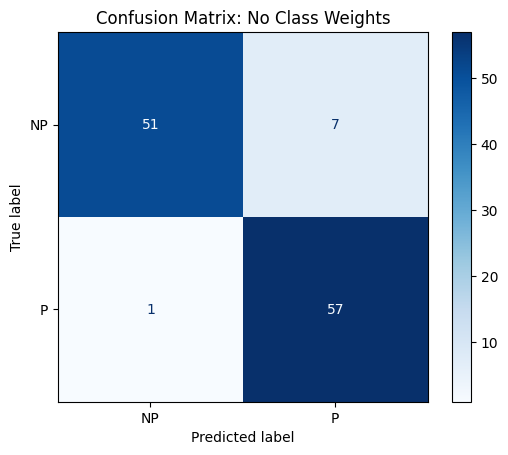

In [13]:

cm = confusion_matrix(true_classes, predicted_classes)
labels = ['NP', 'P']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix: No Class Weights")
plt.show()


In [7]:




conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),  # Add dropout to reduce overfitting
    layers.Dense(1, activation='sigmoid')
])

# Initial Training of the Classifier Head 
conv_base.trainable = False
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

print("Starting Prototype Initial Training")
model.fit(
    train_generator,
    steps_per_epoch=29,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=0) # Suppress output for this part


Starting Prototype Initial Training


/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [8]:

# Fine-Tuning with Class Weights (prioritizing precipitation)
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

class_weights = {0: 1, 1: 2} # Add class weights to improve recall

print("\nStarting Prototype Fine Tuning")
history_fine_tune = model.fit(
    train_generator,
    steps_per_epoch=29,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=6,
    class_weight=class_weights,
    verbose=2)



Starting Prototype Fine Tuning
Epoch 1/20
29/29 - 34s - 1s/step - accuracy: 0.8664 - loss: 0.3869 - val_accuracy: 0.8103 - val_loss: 0.3510
Epoch 2/20
29/29 - 17s - 593ms/step - accuracy: 0.9052 - loss: 0.3101 - val_accuracy: 0.8448 - val_loss: 0.3475
Epoch 3/20
29/29 - 15s - 512ms/step - accuracy: 0.8879 - loss: 0.3488 - val_accuracy: 0.8534 - val_loss: 0.3393
Epoch 4/20
29/29 - 14s - 497ms/step - accuracy: 0.9224 - loss: 0.2717 - val_accuracy: 0.8534 - val_loss: 0.3592
Epoch 5/20
29/29 - 14s - 478ms/step - accuracy: 0.9203 - loss: 0.2860 - val_accuracy: 0.8534 - val_loss: 0.3605
Epoch 6/20
29/29 - 21s - 723ms/step - accuracy: 0.9267 - loss: 0.2571 - val_accuracy: 0.8793 - val_loss: 0.2523
Epoch 7/20
29/29 - 16s - 539ms/step - accuracy: 0.9267 - loss: 0.2500 - val_accuracy: 0.9138 - val_loss: 0.2028
Epoch 8/20
29/29 - 15s - 534ms/step - accuracy: 0.9138 - loss: 0.2945 - val_accuracy: 0.8534 - val_loss: 0.3367
Epoch 9/20
29/29 - 15s - 503ms/step - accuracy: 0.9353 - loss: 0.2232 - val

In [9]:
# metrics 

print("\nEvaluating Final Prototype ")
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.n // validation_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = validation_generator.classes

print(f"Final F1 Score: {f1_score(true_classes, predicted_classes):.4f}")
print("\n NO CLASS WEIGHTS Final Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=['No Precipitation', 'Precipitation']))


Evaluating Final Prototype 
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 666ms/step
Final F1 Score: 0.8976

 NO CLASS WEIGHTS Final Classification Report:
                  precision    recall  f1-score   support

No Precipitation       0.98      0.79      0.88        58
   Precipitation       0.83      0.98      0.90        58

        accuracy                           0.89       116
       macro avg       0.90      0.89      0.89       116
    weighted avg       0.90      0.89      0.89       116



Best model performance thus far when 

class weights added to prioritize identifying percipitation. 
Droput set to .2 to reduce overfitting
frozen VGG16 base with custom classifier head

F1 = .94 with precision and recall balanced across classes , macro average and weighted average F1 = .94 showing that class weighting experiment worked very well 

THERE IS MORE FINE TUNING TO BE DONE

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 663ms/step


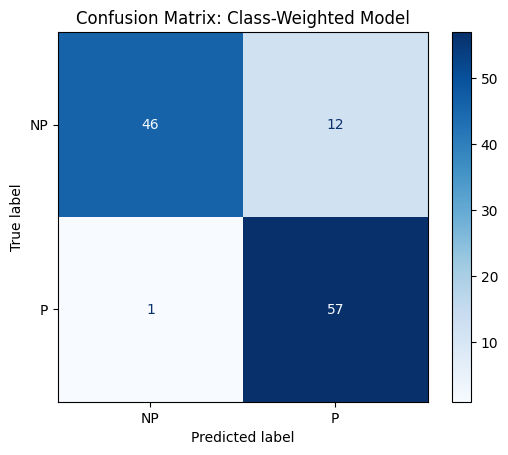

In [ ]:

#  predictions on validation set
y_true = validation_generator.classes
y_pred_prob = model.predict(validation_generator)
y_pred = (y_pred_prob > 0.5).astype("int").flatten()

cm = confusion_matrix(y_true, y_pred)
labels = list(validation_generator.class_indices.keys())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix: Class-Weighted Model")
plt.show()
